
# Position of a quasar

You measure the position of a quasar $N$ times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma = 0.2$.

## Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i | \mu, \sigma )$;
- Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points;
- Just read off the maximum likelihood solution (e.g. using np.argsort);
- Compare it with the MLE estimator derived above.

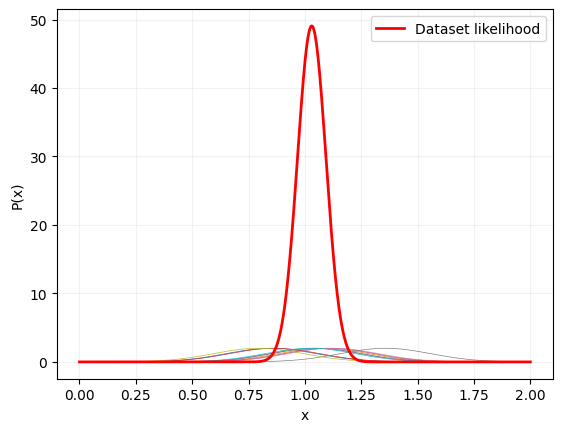

The MLE through the numerical method is 1.031
The MLE calculated analytically is 1.0303
Relative error: 0.1%


In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 1
sigma = 0.2
N = 10     # Number of measurements

# Generate random points
x_sample = np.random.normal(loc=mu, scale=sigma, size=N)

grid = np.linspace(0, 2, 1000)

likelihood = 1

for i in range(N):
    gaussian = norm(loc=x_sample[i],scale=sigma)     # Probability of the datapoint given the parameter -> likelihood of the single measurement
    plt.plot(grid, gaussian.pdf(grid), lw = 0.5)
    likelihood *= gaussian.pdf(grid)

plt.plot(grid, likelihood, lw = 2, c = 'red', label = 'Dataset likelihood')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(c='grey', alpha = 0.1)
plt.legend()
plt.show()

# Searching the MLE
sort = np.argsort(likelihood)
max_ind = sort[-1]
MLE = grid[max_ind]
print('The MLE through the numerical method is ' + str(round(MLE, 4)))

# Confronting with the theoretical MLE (arithmetic mean)
MLE_exp = np.mean(x_sample)
rel_err = abs(MLE - MLE_exp) / MLE_exp * 100
print('The MLE calculated analytically is ' + str(round(MLE_exp, 4)))
print('Relative error: ' + str(round(rel_err, 1)) + '%')



## Part 2

Check the Fisher matrix error estimate makes sense:

- Do a rough $2^{nd}$ order differentation of our log-likelihood function with np.diff,
- divide through by our $\Delta\theta^2$ to get the correct normalization,
- multiply by $-1$,
- then take the square root.
- Compare with the Fisher matrix error derived above;
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

In [121]:
# I want the log likelihood:
lnL = np.log(product)

d2lnL = np.diff(lnL, n=2)     
dx = grid[1]-grid[0]     # The x values are equally spaced
sigma_mu = d2lnL/(dx**2)
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)
print(sigma_mu[max_ind])
print(sigma/N**0.5)

0.06324555320330495
0.06324555320336758
